# Análise Exploratória

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from lazypredict.Supervised import LazyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from scipy import stats


## Coleta dos dados

In [3]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [4]:
df = df.drop(['Unnamed: 8', 'Unnamed: 9'], axis=1)
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Medidas descritivas

In [5]:
df.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Visualização dos dados

In [6]:
labels = df['label'].astype('category').values
labels = list(labels.categories)
labels

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

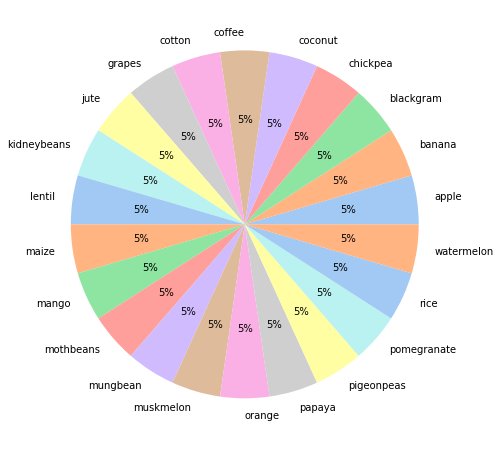

In [7]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')

plt.pie(df['label'].groupby(df['label']).count(), labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

É possível perceber que a distribuição dos valores é idêntica.

### Matriz de correlação

In [8]:
corr = df.corr()
corr

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_2240\2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot: >

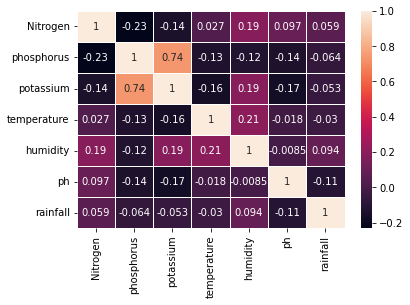

In [9]:
# Mapa de calor com as correlações
sns.heatmap(corr, annot=True, linewidths=0.5)

A maior parte das variáveis **não** estão relacionadas entre si, com exceção dos atributos "potassium" e "phosphorus", que possuem uma correlação positiva considerável. Abaixo é possível visualizar uma matriz de dispersão:

In [10]:
# sns.pairplot(df, hue='label')

É possível observar, como anteriormente, que aparentemente não há grande correlação entre as variáveis

Abaixo, é realizado um teste de hipóteses para verificar se a variável 'ph' provém de uma distribuição normal. Seguem as hipóteses:

$$
\begin{cases}
H_0: X \sim N(\mu, \sigma) \\
H_1: X \text{ não possui distribuição normal}
\end{cases}
$$

onde $X$ denota a variável 'ph'.

In [11]:
_, p_value = stats.shapiro(df['ph'])
alpha = 0.05

if p_value < alpha:
    print("A um nível de significância de 95%, rejeita-se a hipótese nula")
else:
    print("A um nível de confiança de 95%, é plausível inferir que a variável 'ph' possui distribuição normal")

A um nível de significância de 95%, rejeita-se a hipótese nula


In [12]:
df.head(3)

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


In [13]:
dummies = pd.get_dummies(df['label'])

In [14]:
new_df = pd.concat([df,dummies], axis=1)
new_df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,apple,banana,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0,0,...,0,0,0,0,0,0,0,0,1,0


C:\Users\Eduardo\AppData\Local\Temp\ipykernel_2240\1258832435.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = new_df.corr()


<AxesSubplot: >

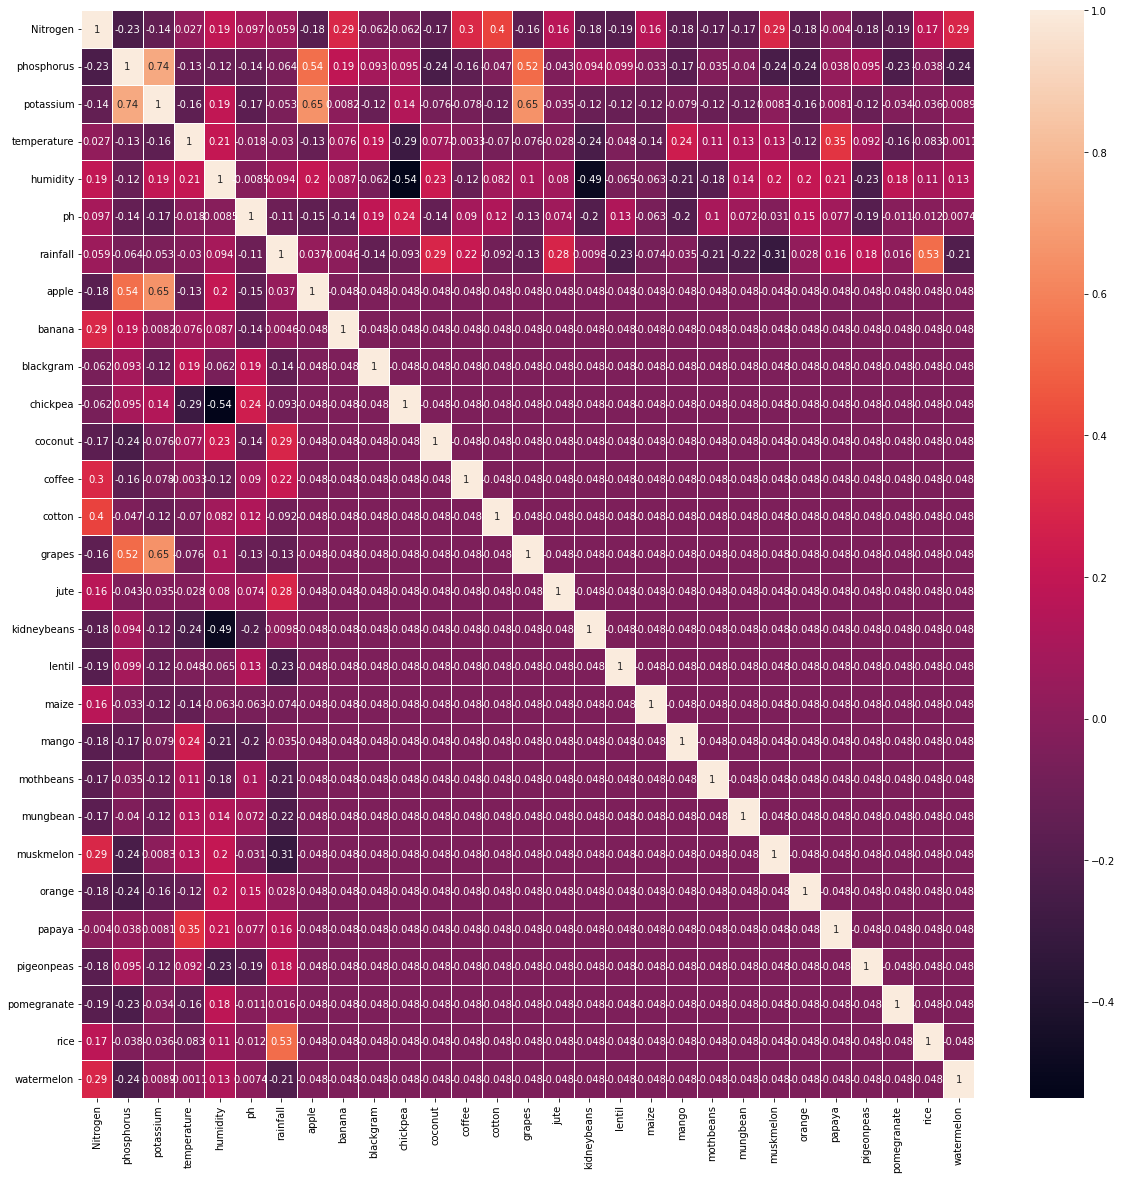

In [15]:
# Mapa de calor com as correlações
plt.figure(figsize=(20,20))
corr = new_df.corr()
sns.heatmap(corr, annot=True, linewidths=0.5)

In [39]:
# from lazypredict.Supervised import LazyRegressor
# from sklearn.utils import shuffle


X = df.drop('label',axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42, stratify = y)
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)
# models

In [68]:
# Modelos utilizados
knn = KNeighborsClassifier()
nn = MLPClassifier(random_state=42)
svm = SVC()
nb = GaussianNB()
tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)


In [82]:
# Parametros dos modelos
kfold = StratifiedKFold(n_splits=5)
n_neighbors = range(1,31)
parameters_knn = {'n_neighbors': n_neighbors}
parameters_nn = {'hidden_layer_sizes': [[], [5], [10], [5,5], [10,10], [25], [100], [50,50]]}
max_depths = range(5,20)
parameters_tree = {'max_depth': max_depths, 'criterion': ['gini', 'entropy', 'log_loss']}
parameters_rf = {'max_depth': max_depths}

In [ ]:
# Normalizações dos dados
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

minmax = MinMaxScaler()
X_MinMax = minmax.fit_transform(X_train)

In [55]:
# knn 
gs_knn = GridSearchCV(knn, parameters_knn, cv=5)
best_knn = gs_knn.fit(X_MinMax,y_train)

print(best_knn.best_params_)
print(best_knn.score(minmax.transform(X_test),y_test))

{'n_neighbors': 3}
0.9840909090909091


In [66]:
# SVM

scores = []

for train_index, test_index in kfold.split(X_train,y_train):
    train_data, test_data = X_norm[train_index], X_norm[test_index]
    train_labels, test_labels = y_train.values[train_index], y_train.values[test_index]

    svm.fit(train_data,train_labels)
    pred = svm.score(test_data,test_labels)
    scores.append(pred)
    
print('Acurácia no treino com 5-fold',np.mean(scores))

print('Acurácia no teste: ', svm.score(scaler.transform(X_test),y_test))

Acurácia no treino com 5-fold 0.9761363636363637
Acurácia no teste:  0.9818181818181818


In [69]:
# Decision Tree

gs_tree = GridSearchCV(tree, parameters_tree, cv = 5)
best_tree = gs_tree.fit(X_norm,y_train)

print(best_tree.best_params_)
print(best_tree.score(scaler.transform(X_test),y_test))

{'criterion': 'gini', 'max_depth': 13}
0.9818181818181818


In [83]:
# Random Forest

# WARNING: Este código demora MUITO para rodar, cuidado ao descomentar

gs_rf = GridSearchCV(rf, parameters_rf, cv = 5)
best_tree = gs_rf.fit(X_norm,y_train)

print(gs_rf.best_params_)
print(gs_rf.score(scaler.transform(X_test),y_test))

{'max_depth': 9, 'n_estimators': 100}
0.9954545454545455


In [84]:
# neural network
gs_nn = GridSearchCV(nn, parameters_nn, cv=5)
best_nn = gs_nn.fit(X_norm,y_train)

print(best_nn.best_params_)
print(best_nn.score(scaler.transform(X_test),y_test))

C:\Users\Eduardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\E

{'hidden_layer_sizes': [50, 50]}
0.9886363636363636


C:\Users\Eduardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
